In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import numpy as np
import torch

from astropy import constants, units

from p3droslo.model import TensorModel, SphericallySymmetric
from p3droslo.loss  import Loss

from test_1D        import get_model, get_obs, forward, frequencies, velocities, r_in, v_fac

You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


In [2]:
obs = get_obs()

# Only CO
---

In [3]:
truth_model_name       = 'models/test_model_1D.h5'
recon_model_name_10    = 'models/test_model_1D_rec_CO_10.h5'
recon_model_name_10_2  = 'models/test_model_1D_rec_CO_10_2.h5'
recon_model_name_50    = 'models/test_model_1D_rec_CO_50.h5'
recon_model_name_50_2  = 'models/test_model_1D_rec_CO_50_2.h5'
recon_model_name_100   = 'models/test_model_1D_rec_CO_100.h5'
recon_model_name_100_2 = 'models/test_model_1D_rec_CO_100_2.h5'

In [4]:
model_1D_truth       = TensorModel.load(truth_model_name)
model_1D_recon_10    = TensorModel.load(recon_model_name_10)
model_1D_recon_10_2  = TensorModel.load(recon_model_name_10_2)
model_1D_recon_50    = TensorModel.load(recon_model_name_50)
model_1D_recon_50_2  = TensorModel.load(recon_model_name_50_2)
model_1D_recon_100   = TensorModel.load(recon_model_name_100)
model_1D_recon_100_2 = TensorModel.load(recon_model_name_100_2)

In [5]:
r = model_1D_truth.get_coords(origin=np.array([0]))
r[r<r_in] = r_in

In [6]:
img_10    = forward(SphericallySymmetric(model_1D_recon_10   ))
img_10_2  = forward(SphericallySymmetric(model_1D_recon_10_2 ))
img_50    = forward(SphericallySymmetric(model_1D_recon_50   ))
img_50_2  = forward(SphericallySymmetric(model_1D_recon_50_2 ))
img_100   = forward(SphericallySymmetric(model_1D_recon_100  ))
img_100_2 = forward(SphericallySymmetric(model_1D_recon_100_2))

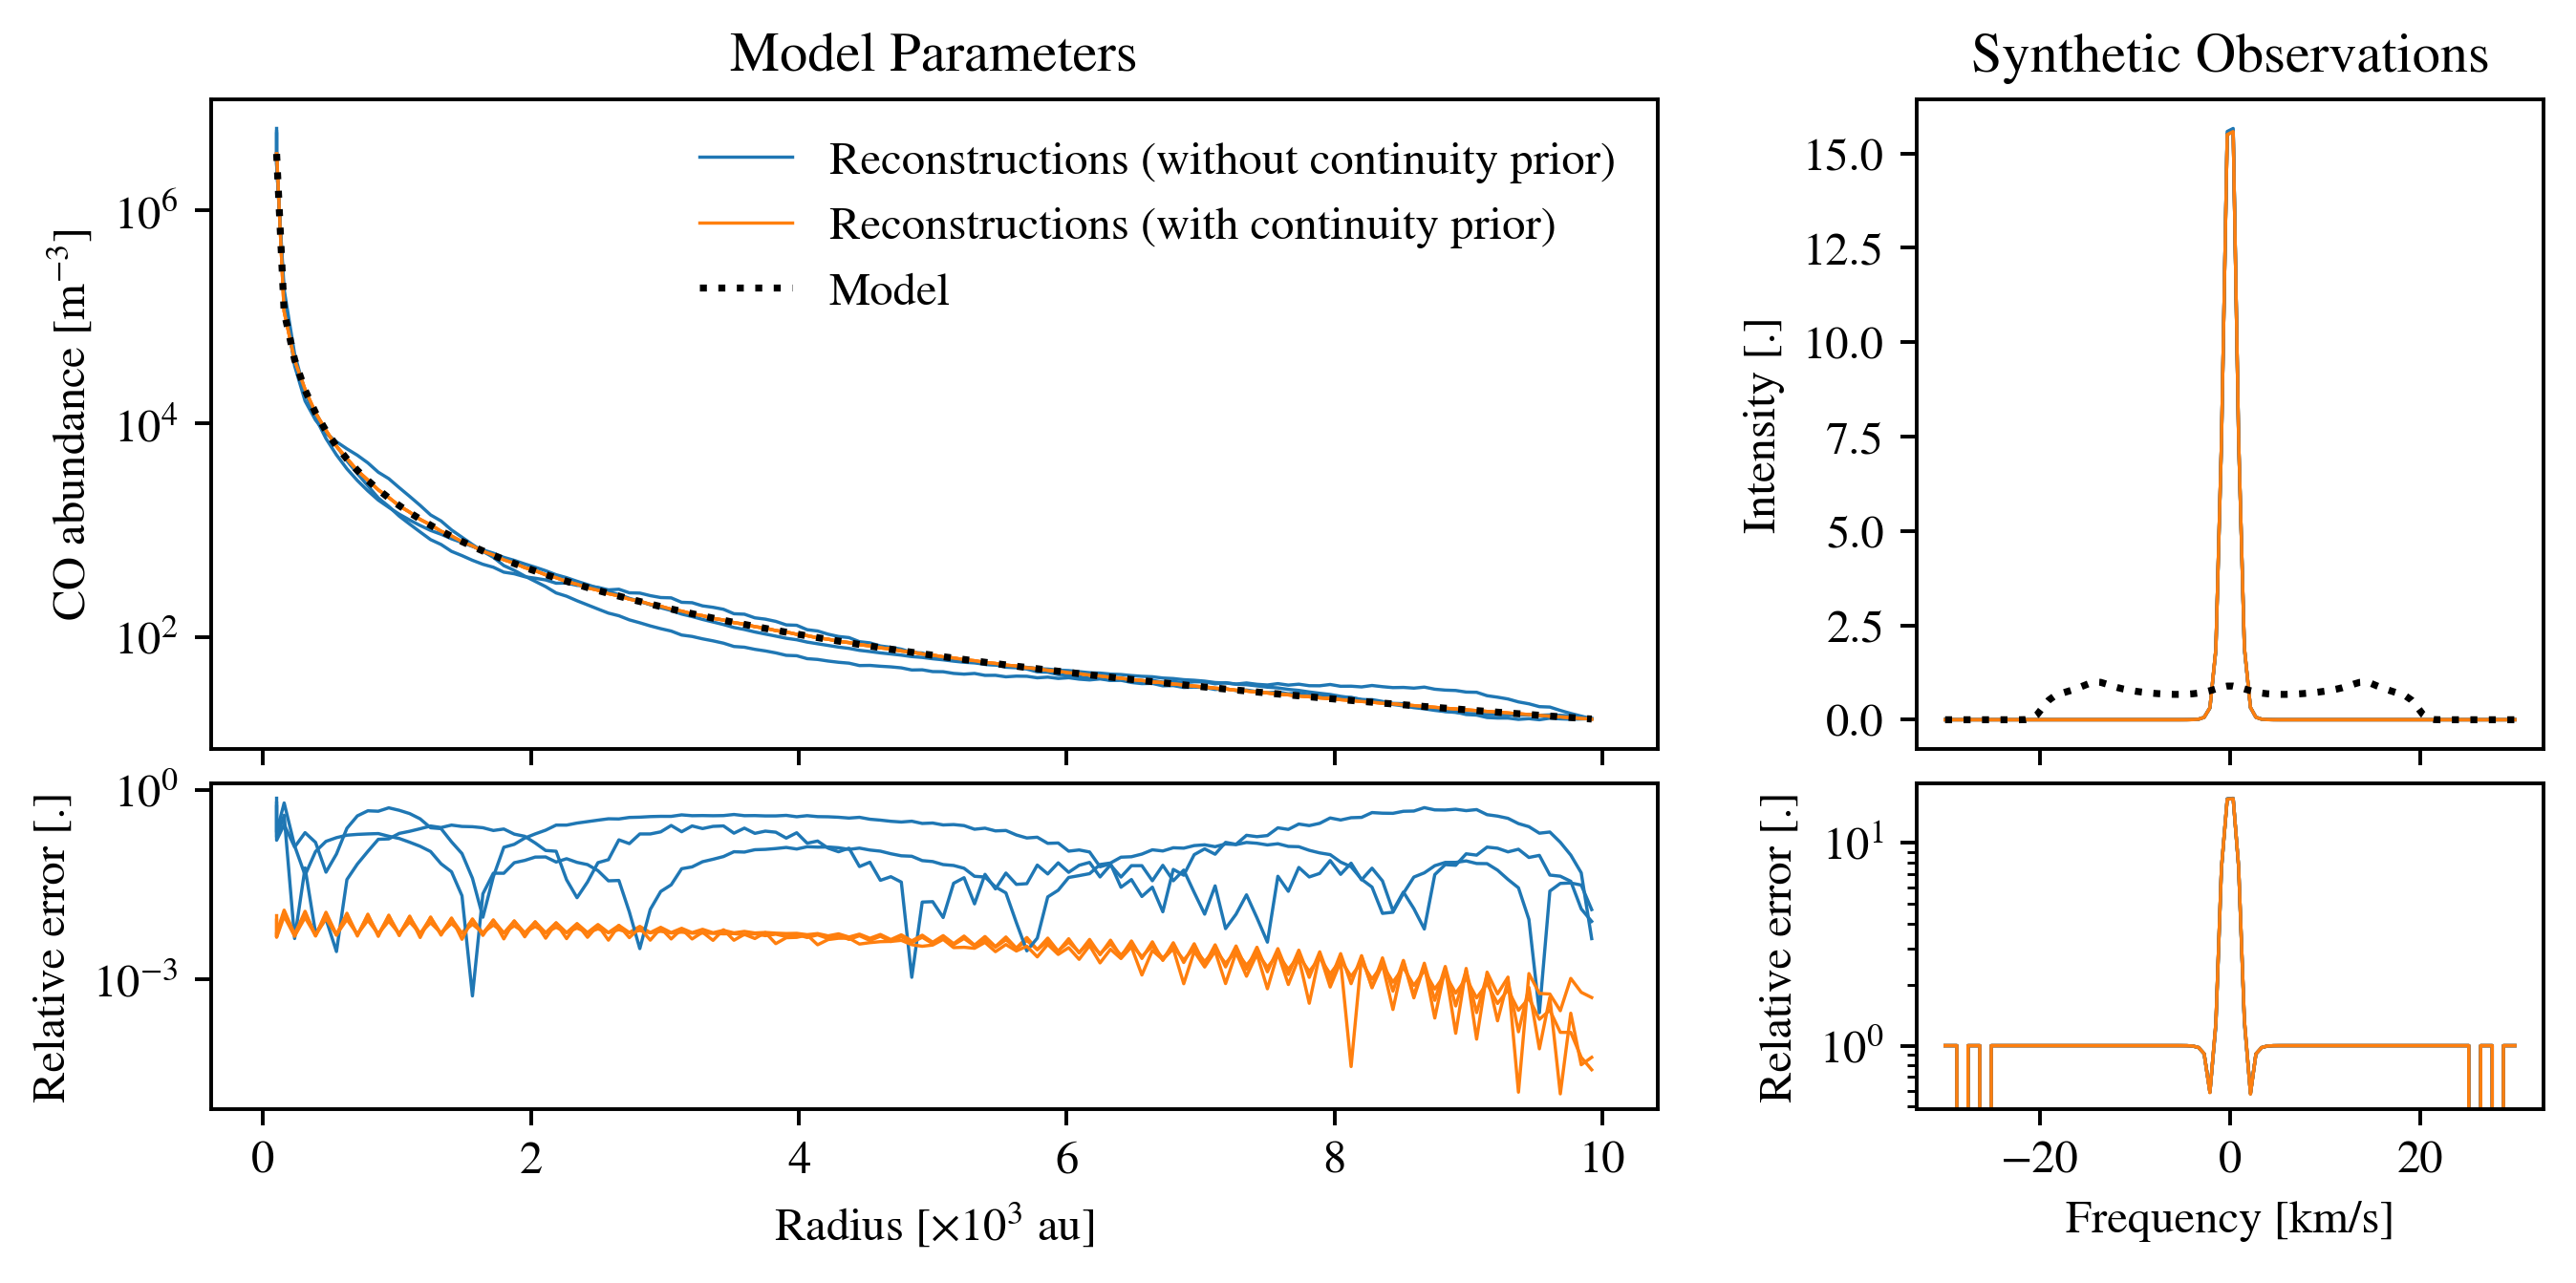

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=350, figsize=(9,4), gridspec_kw={'width_ratios':[3,1.3], 'height_ratios':[2,1], 'wspace':0.25, 'hspace':0.07})

axs[0,0].set_title('Model Parameters')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10   ['log_CO']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions (without continuity prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_2 ['log_CO']).data, linewidth=0.7, c='tab:orange',       label='Reconstructions (with continuity prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_50   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_50_2 ['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100  ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth      ['log_CO']).data, c='k', linestyle=':', label='Model')
axs[0,0].set_xticklabels([])
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'CO abundance [m$^{-3}$]')
# axs[0,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')
axs[0,0].legend(frameon=False)

tr = torch.exp(model_1D_truth      ['log_CO']).data

axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_2 ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange', label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_50   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_50_2 ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100  ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'Relative error [.]')
axs[1,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

# plt.title("Model & Reconstruction")
axs[0,1].set_title('Synthetic Observations')
axs[0,1].plot(velocities/1.0e+3, img_10   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_10_2 .data/obs.data.max(), c='tab:orange', linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_50   .data/obs.data.max(), c='tab:blue',   linewidth=0.7)
axs[0,1].plot(velocities/1.0e+3, img_50_2 .data/obs.data.max(), c='tab:orange', linewidth=0.7)
axs[0,1].plot(velocities/1.0e+3, img_100  .data/obs.data.max(), c='tab:blue',   linewidth=0.7)
axs[0,1].plot(velocities/1.0e+3, img_100_2.data/obs.data.max(), c='tab:orange', linewidth=0.7)
axs[0,1].plot(velocities/1.0e+3, obs      .data/obs.data.max(), c='k', linestyle=':', label='Model')
axs[0,1].set_ylabel(r"Intensity [.]")
# axs[0,1].set_xlabel(r"Frequency [km/s]")
axs[0,1].set_xticklabels([])
# ax2.legend()

tr = obs      .data/obs.data.max() 

axs[1,1].plot(velocities/1.0e+3, abs(img_10   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_10_2 .data/obs.data.max()-tr)/tr, c='tab:orange', linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_50   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7)
axs[1,1].plot(velocities/1.0e+3, abs(img_50_2 .data/obs.data.max()-tr)/tr, c='tab:orange', linewidth=0.7)
axs[1,1].plot(velocities/1.0e+3, abs(img_100  .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7)
axs[1,1].plot(velocities/1.0e+3, abs(img_100_2.data/obs.data.max()-tr)/tr, c='tab:orange', linewidth=0.7)
axs[1,1].set_ylabel(r"Intensity [.]")
axs[1,1].set_xlabel(r"Frequency [km/s]")
axs[1,1].set_ylabel(r'Relative error [.]')
axs[1,1].set_yscale('log')

plt.savefig('test_1D_only_CO', bbox_inches='tight')

# CO and T
---

In [8]:
truth_model_name       = 'models/test_model_1D.h5'
recon_model_name_30_1000    = 'models/test_model_1D_rec_CO_30_tmp_1000.h5'
recon_model_name_30_1000_2    = 'models/test_model_1D_rec_CO_30_tmp_1000_2.h5'
recon_model_name_10_3000    = 'models/test_model_1D_rec_CO_10_tmp_3000.h5'
recon_model_name_10_3000_2    = 'models/test_model_1D_rec_CO_10_tmp_3000_2.h5'
recon_model_name_100_2000    = 'models/test_model_1D_rec_CO_100_tmp_2000.h5'
recon_model_name_100_2000_2    = 'models/test_model_1D_rec_CO_100_tmp_2000_2.h5'

In [9]:
model_1D_truth       = TensorModel.load(truth_model_name)
model_1D_recon_30_1000    = TensorModel.load(recon_model_name_30_1000)
model_1D_recon_30_1000_2    = TensorModel.load(recon_model_name_30_1000_2)
model_1D_recon_10_3000    = TensorModel.load(recon_model_name_10_3000)
model_1D_recon_10_3000_2    = TensorModel.load(recon_model_name_10_3000_2)
model_1D_recon_100_2000    = TensorModel.load(recon_model_name_100_2000)
model_1D_recon_100_2000_2    = TensorModel.load(recon_model_name_100_2000_2)

In [10]:
model_1D_recon_30_1000  ['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_30_1000  ['log_velocity']))
# model_1D_recon_30_1000_2['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_30_1000_2['log_velocity']))
model_1D_recon_10_3000  ['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_10_3000  ['log_velocity']))
model_1D_recon_10_3000_2['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_10_3000_2['log_velocity']))
model_1D_recon_100_2000  ['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_100_2000  ['log_velocity']))
model_1D_recon_100_2000_2['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_100_2000_2['log_velocity']))

In [11]:
r = model_1D_truth.get_coords(origin=np.array([0]))
r[r<r_in] = r_in

In [12]:
img_30_1000  = forward(SphericallySymmetric(model_1D_recon_30_1000 ))
img_30_1000_2  = forward(SphericallySymmetric(model_1D_recon_30_1000_2 ))
img_10_3000  = forward(SphericallySymmetric(model_1D_recon_10_3000 ))
img_10_3000_2  = forward(SphericallySymmetric(model_1D_recon_10_3000_2 ))
img_100_2000  = forward(SphericallySymmetric(model_1D_recon_100_2000 ))
img_100_2000_2  = forward(SphericallySymmetric(model_1D_recon_100_2000_2 ))

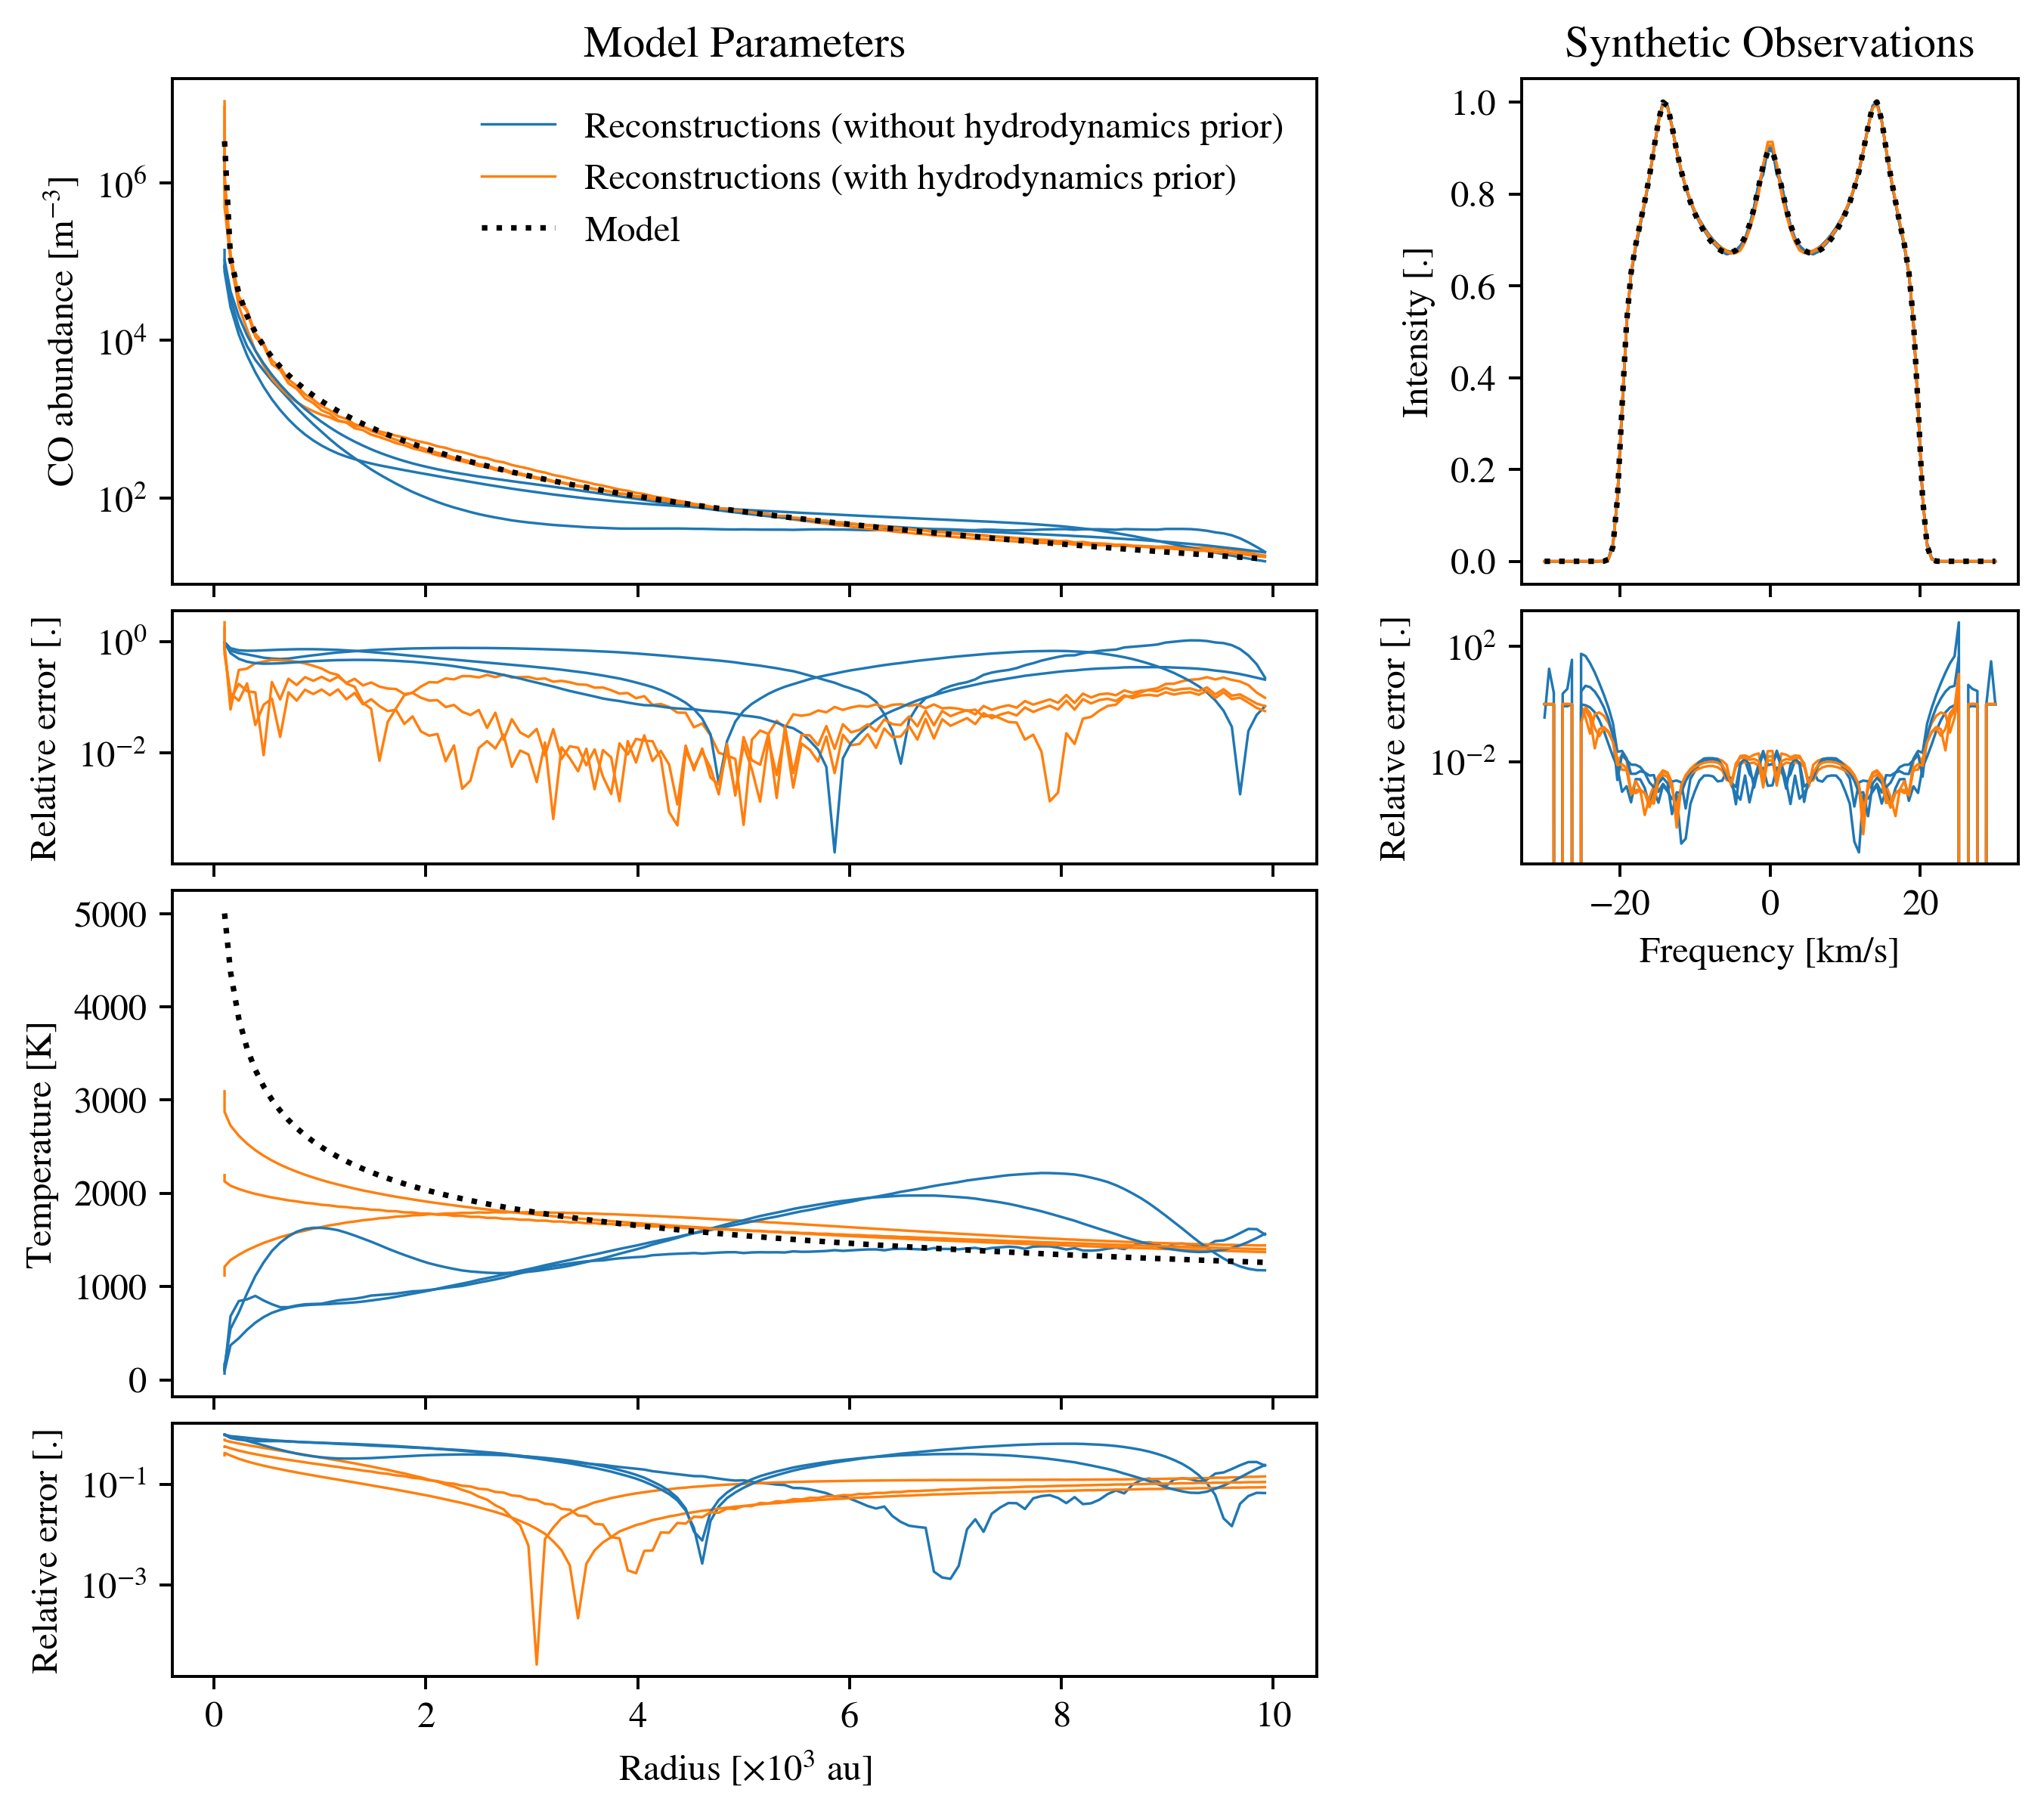

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, dpi=350, figsize=(9,8), gridspec_kw={'width_ratios':[3,1.3], 'height_ratios':[2,1,2,1], 'wspace':0.25, 'hspace':0.07})

axs[0,0].set_title('Model Parameters')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000   ['log_CO']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions (without hydrodynamics prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange',         label='Reconstructions (with hydrodynamics prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth      ['log_CO']).data, c='k', linestyle=':', label='Model')
axs[0,0].set_xticklabels([])
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'CO abundance [m$^{-3}$]')
# axs[0,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')
axs[0,0].legend(frameon=False)


axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000   ['log_temperature']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions (without hydrodynamics priors)')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange',         label='Reconstructions (without hydrodynamics priors)')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth           ['log_temperature']).data, c='k', linestyle=':', label='Model')
axs[2,0].set_ylabel(r'Temperature [K]')

tr = torch.exp(model_1D_truth      ['log_CO']).data

axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'Relative error [.]')
# axs[1,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

tr = torch.exp(model_1D_truth      ['log_temperature']).data

axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].set_yscale('log')
axs[3,0].set_ylabel(r'Relative error [.]')
axs[3,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

# plt.title("Model & Reconstruction")
axs[0,1].set_title('Synthetic Observations')
axs[0,1].plot(velocities/1.0e+3, img_30_1000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_30_1000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_10_3000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_10_3000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_100_2000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_100_2000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, obs      .data/obs.data.max(), c='k', linestyle=':', label='Model')
axs[0,1].set_ylabel(r"Intensity [.]")
# axs[0,1].set_xlabel(r"Frequency [km/s]")
axs[0,1].set_xticklabels([])
# ax2.legend()

tr = obs      .data/obs.data.max() 

axs[1,1].plot(velocities/1.0e+3, abs(img_30_1000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_30_1000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_10_3000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_10_3000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_100_2000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_100_2000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].set_ylabel(r"Intensity [.]")
axs[1,1].set_xlabel(r"Frequency [km/s]")
axs[1,1].set_ylabel(r'Relative error [.]')
axs[1,1].set_yscale('log')

axs[2,1].axis('off')
axs[3,1].axis('off')

plt.savefig('test_1D_CO_and_T', bbox_inches='tight')

# CO, T, velocity
---

In [4]:
truth_model_name              = 'models/test_model_1D.h5'
recon_model_name_30_1000      = 'models/test_model_1D_rec_CO_30_vel_20_tmp_1000.h5'
recon_model_name_30_1000_2    = 'models/test_model_1D_rec_CO_30_vel_20_tmp_1000_2.h5'
recon_model_name_10_3000      = 'models/test_model_1D_rec_CO_10_vel_20_tmp_3000.h5'
recon_model_name_10_3000_2    = 'models/test_model_1D_rec_CO_10_vel_20_tmp_3000_2.h5'
recon_model_name_100_2000     = 'models/test_model_1D_rec_CO_100_vel_20_tmp_2000.h5'
recon_model_name_100_2000_2   = 'models/test_model_1D_rec_CO_100_vel_20_tmp_2000_2.h5'

In [5]:
model_1D_truth       = TensorModel.load(truth_model_name)
model_1D_recon_30_1000    = TensorModel.load(recon_model_name_30_1000)
model_1D_recon_30_1000_2    = TensorModel.load(recon_model_name_30_1000_2)
model_1D_recon_10_3000    = TensorModel.load(recon_model_name_10_3000)
model_1D_recon_10_3000_2    = TensorModel.load(recon_model_name_10_3000_2)
model_1D_recon_100_2000    = TensorModel.load(recon_model_name_100_2000)
model_1D_recon_100_2000_2    = TensorModel.load(recon_model_name_100_2000_2)

In [6]:
model_1D_recon_30_1000  ['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_30_1000  ['log_velocity']))
model_1D_recon_30_1000_2['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_30_1000_2['log_velocity']))
model_1D_recon_10_3000  ['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_10_3000  ['log_velocity']))
model_1D_recon_10_3000_2['log_velocity'].data  =torch.log( 1/v_fac * torch.exp(model_1D_recon_10_3000_2['log_velocity']))
model_1D_recon_100_2000  ['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_100_2000  ['log_velocity']))
model_1D_recon_100_2000_2['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_100_2000_2['log_velocity']))

In [7]:
r = model_1D_truth.get_coords(origin=np.array([0]))
r[r<r_in] = r_in

In [8]:
img_30_1000  = forward(SphericallySymmetric(model_1D_recon_30_1000 ))
img_30_1000_2  = forward(SphericallySymmetric(model_1D_recon_30_1000_2 ))
img_10_3000  = forward(SphericallySymmetric(model_1D_recon_10_3000 ))
img_10_3000_2  = forward(SphericallySymmetric(model_1D_recon_10_3000_2 ))
img_100_2000  = forward(SphericallySymmetric(model_1D_recon_100_2000 ))
img_100_2000_2  = forward(SphericallySymmetric(model_1D_recon_100_2000_2 ))

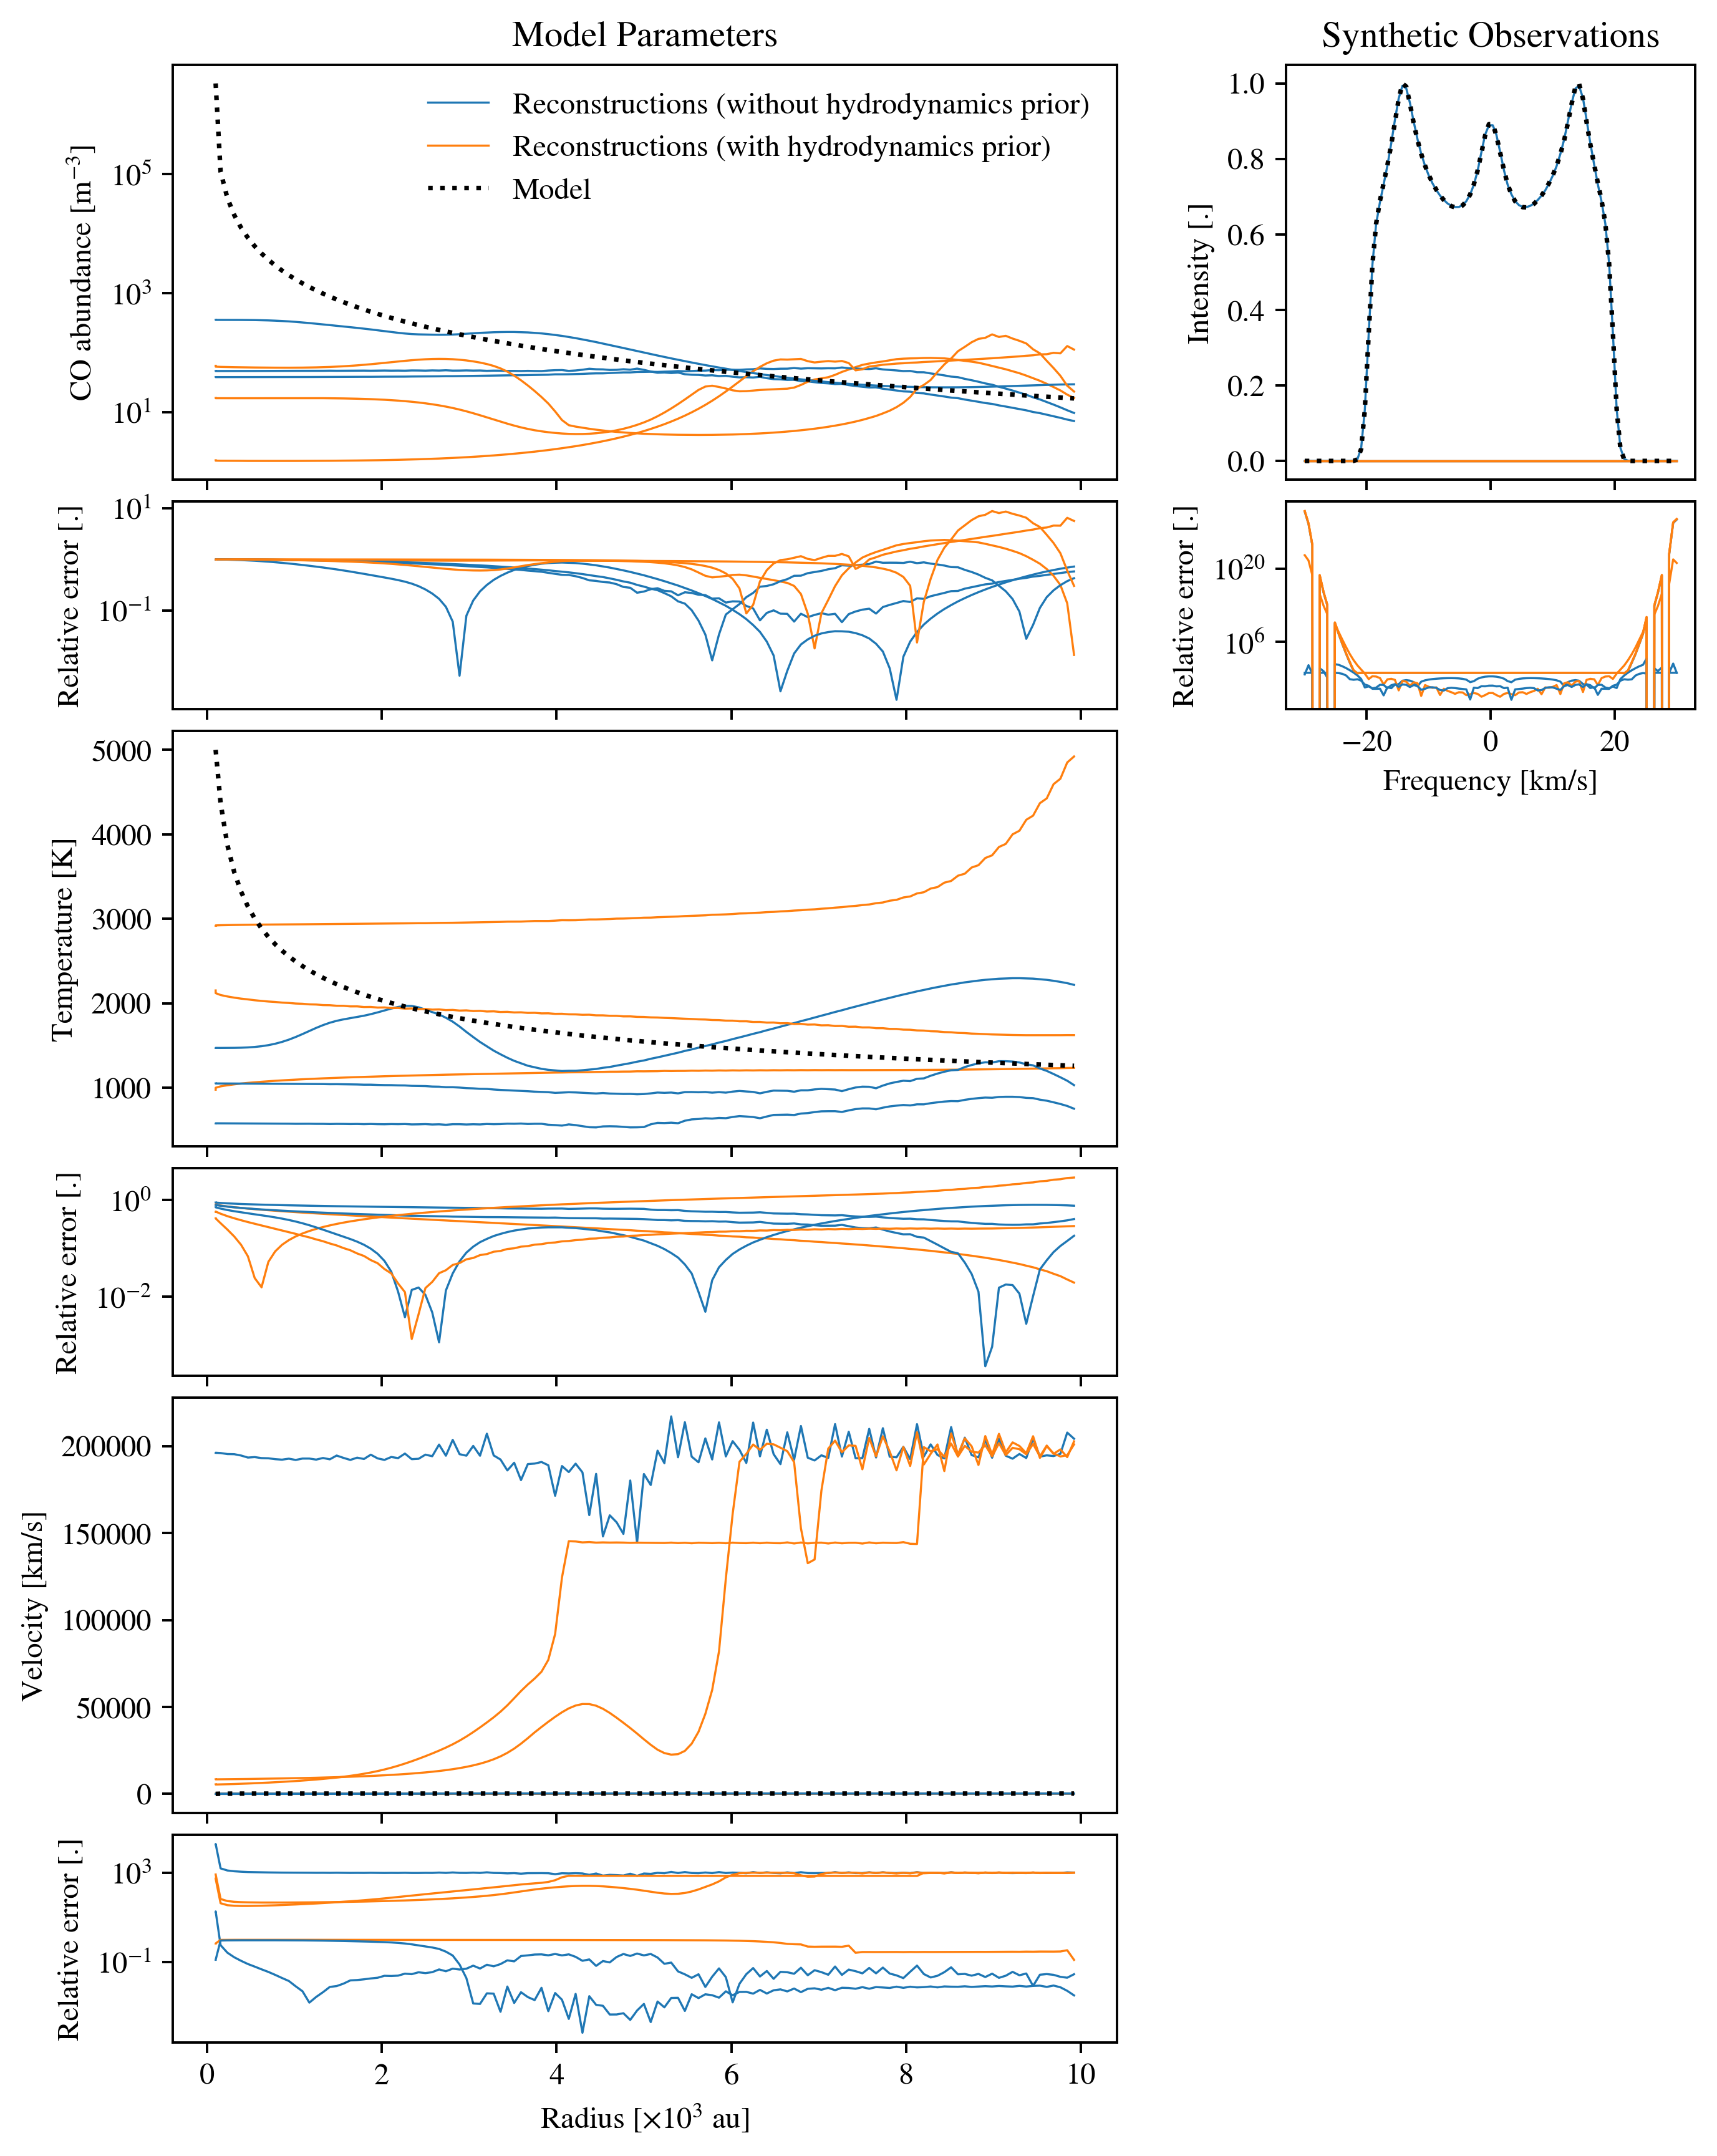

In [11]:
fig, axs = plt.subplots(nrows=6, ncols=2, dpi=350, figsize=(9,12), gridspec_kw={'width_ratios':[3,1.3], 'height_ratios':[2,1,2,1,2,1], 'wspace':0.25, 'hspace':0.07})

axs[0,0].set_title('Model Parameters')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000   ['log_CO']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions (without hydrodynamics prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange',         label='Reconstructions (with hydrodynamics prior)')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000_2   ['log_CO']).data, linewidth=0.7, c='tab:orange')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth      ['log_CO']).data, c='k', linestyle=':', label='Model')
axs[0,0].set_xticklabels([])
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'CO abundance [m$^{-3}$]')
# axs[0,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')
axs[0,0].legend(frameon=False)


axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000   ['log_temperature']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions (without hydrodynamics priors)')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange',         label='Reconstructions (without hydrodynamics priors)')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000_2   ['log_temperature']).data, linewidth=0.7, c='tab:orange')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth           ['log_temperature']).data, c='k', linestyle=':', label='Model')
axs[2,0].set_ylabel(r'Temperature [K]')

axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue',         label='Reconstructions (without hydrodynamics priors)')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_30_1000_2   ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:orange',         label='Reconstructions (without hydrodynamics priors)')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_10_3000_2   ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:orange')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000    ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_100_2000_2  ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:orange')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth             ['log_velocity']).data * 1.0e-3, c='k', linestyle=':', label='Model')
axs[4,0].set_ylabel(r'Velocity [km/s]')


tr = torch.exp(model_1D_truth      ['log_CO']).data

axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'Relative error [.]')
# axs[1,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

tr = torch.exp(model_1D_truth      ['log_temperature']).data

axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[3,0].set_yscale('log')
axs[3,0].set_ylabel(r'Relative error [.]')
axs[3,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

tr = torch.exp(model_1D_truth      ['log_velocity']).data

axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_30_1000_2   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_10_3000_2   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_100_2000_2   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:orange',   label='Reconstructions')
axs[5,0].set_yscale('log')
axs[5,0].set_ylabel(r'Relative error [.]')
axs[5,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')



# plt.title("Model & Reconstruction")
axs[0,1].set_title('Synthetic Observations')
axs[0,1].plot(velocities/1.0e+3, img_30_1000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_30_1000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
# axs[0,1].plot(velocities/1.0e+3, img_10_3000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
# axs[0,1].plot(velocities/1.0e+3, img_10_3000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_100_2000   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_100_2000_2   .data/obs.data.max(), c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, obs      .data/obs.data.max(), c='k', linestyle=':', label='Model')
axs[0,1].set_ylabel(r"Intensity [.]")
# axs[0,1].set_xlabel(r"Frequency [km/s]")
axs[0,1].set_xticklabels([])
# ax2.legend()

tr = obs      .data/obs.data.max() 

axs[1,1].plot(velocities/1.0e+3, abs(img_30_1000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_30_1000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_10_3000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_10_3000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_100_2000   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_100_2000_2   .data/obs.data.max()-tr)/tr, c='tab:orange',   linewidth=0.7,         label='Reconstructions')
axs[1,1].set_ylabel(r"Intensity [.]")
axs[1,1].set_xlabel(r"Frequency [km/s]")
axs[1,1].set_ylabel(r'Relative error [.]')
axs[1,1].set_yscale('log')

axs[2,1].axis('off')
axs[3,1].axis('off')
axs[4,1].axis('off')
axs[5,1].axis('off')

plt.savefig('test_1D_CO_T_and_velo', bbox_inches='tight')

# CO --- T, velocity analytic
---

In [4]:
truth_model_name              = 'models/test_model_1D.h5'
recon_model_name_1            = 'models/test_model_all_CO_30_beta_1.0_epsilon_1.0.h5'
recon_model_name_2            = 'models/test_model_all_CO_10_beta_0.5_epsilon_0.3.h5'
recon_model_name_3            = 'models/test_model_all_CO_30_beta_0.9_epsilon_0.9.h5'
recon_model_name_4            = 'models/test_model_all_CO_25_beta_0.9_epsilon_0.9.h5'
recon_model_name_5            = 'models/test_model_all_CO_25_beta_0.9_epsilon_0.85.h5'

In [5]:
model_1D_truth      = TensorModel.load(truth_model_name)
model_1D_recon_1    = TensorModel.load(recon_model_name_1)
model_1D_recon_2    = TensorModel.load(recon_model_name_2)
model_1D_recon_3    = TensorModel.load(recon_model_name_3)
model_1D_recon_4    = TensorModel.load(recon_model_name_4)
model_1D_recon_5    = TensorModel.load(recon_model_name_5)

In [6]:
# model_1D_recon_1['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_1['log_velocity']))
# model_1D_recon_2['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_2['log_velocity']))
# model_1D_recon_3['log_velocity'].data = torch.log(1/v_fac * torch.exp(model_1D_recon_3['log_velocity']))

In [7]:
r = model_1D_truth.get_coords(origin=np.array([0]))
r[r<r_in] = r_in

In [8]:
img_1  = forward(SphericallySymmetric(model_1D_recon_1 ))
img_2  = forward(SphericallySymmetric(model_1D_recon_2 ))
img_3  = forward(SphericallySymmetric(model_1D_recon_3 ))
img_4  = forward(SphericallySymmetric(model_1D_recon_4 ))
img_5  = forward(SphericallySymmetric(model_1D_recon_5 ))

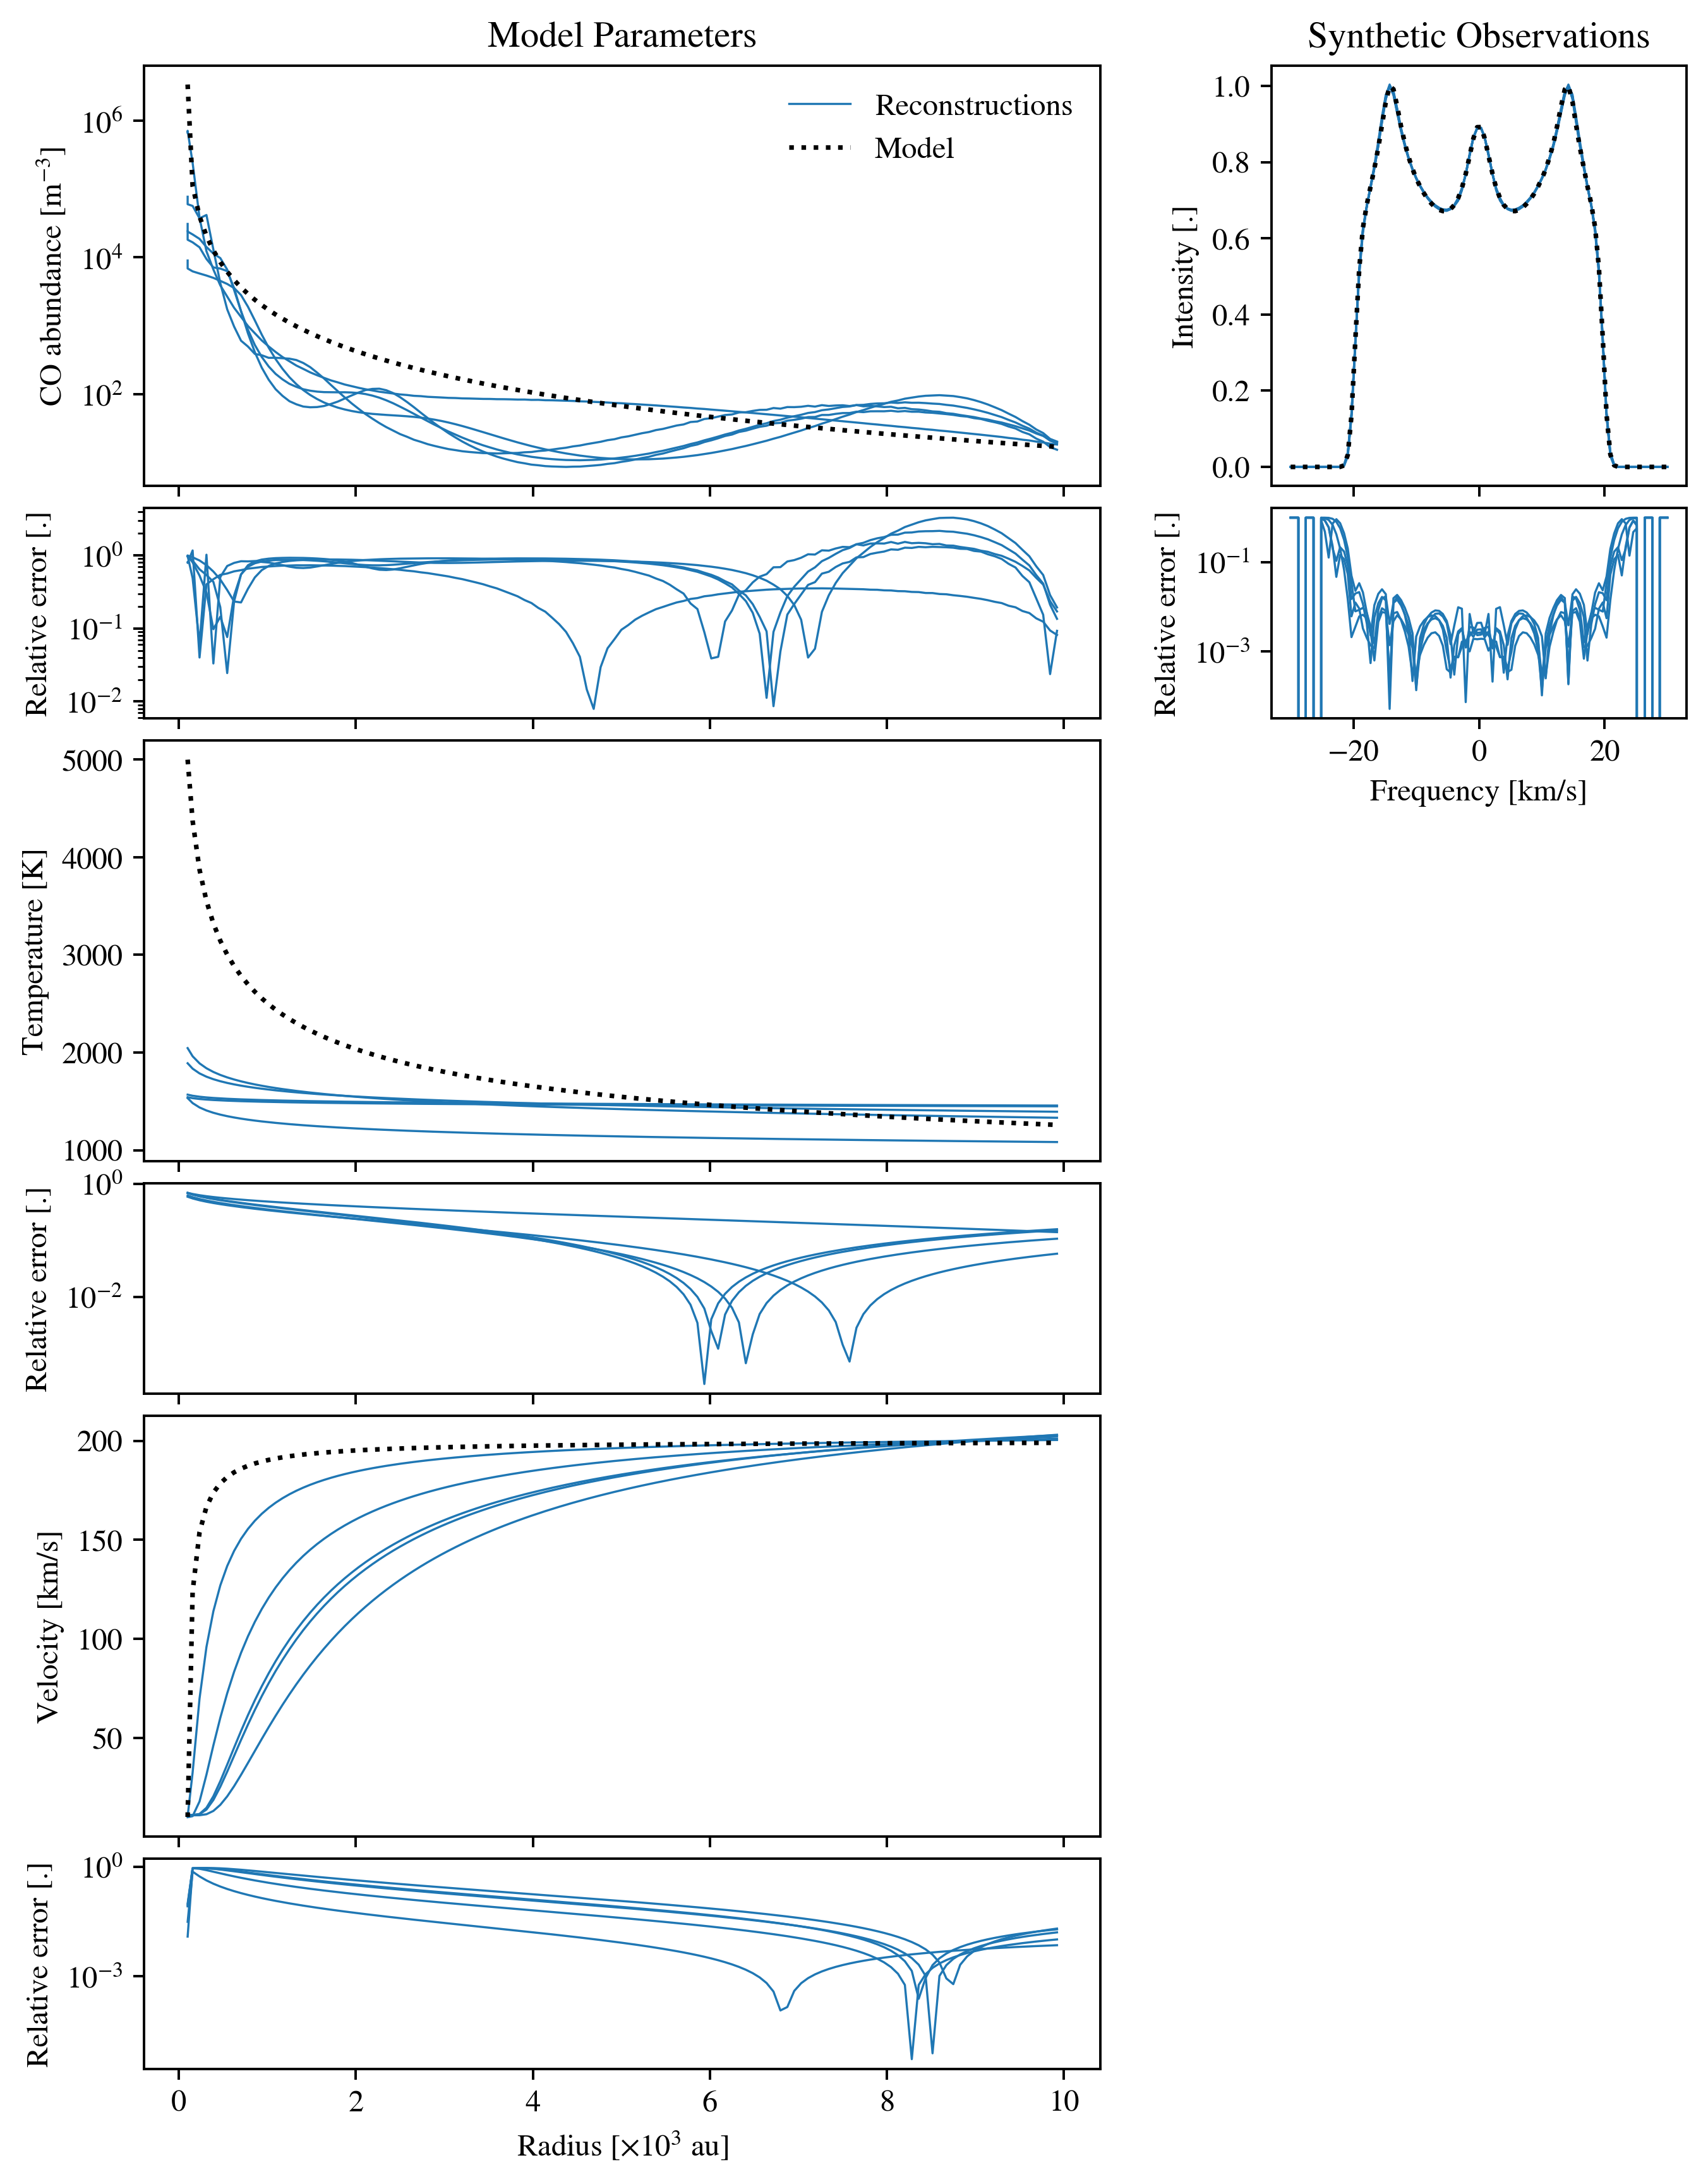

In [9]:
fig, axs = plt.subplots(nrows=6, ncols=2, dpi=350, figsize=(9,12), gridspec_kw={'width_ratios':[3,1.3], 'height_ratios':[2,1,2,1,2,1], 'wspace':0.25, 'hspace':0.07})

axs[0,0].set_title('Model Parameters')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_1   ['log_CO']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_2   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_3   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_4   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_5   ['log_CO']).data, linewidth=0.7, c='tab:blue')
axs[0,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth      ['log_CO']).data, c='k', linestyle=':', label='Model')
axs[0,0].set_xticklabels([])
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'CO abundance [m$^{-3}$]')
# axs[0,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')
axs[0,0].legend(frameon=False)


axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_1   ['log_temperature']).data, linewidth=0.7, c='tab:blue',         label='Reconstructions')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_2   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_3   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_4   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_5   ['log_temperature']).data, linewidth=0.7, c='tab:blue')
axs[2,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth           ['log_temperature']).data, c='k', linestyle=':', label='Model')
axs[2,0].set_ylabel(r'Temperature [K]')

axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_1     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue',         label='Reconstructions')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_2     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_3     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_4     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_recon_5     ['log_velocity']).data * 1.0e-3, linewidth=0.7, c='tab:blue')
axs[4,0].plot(r / (1.0e+3 * units.au).si.value, torch.exp(model_1D_truth             ['log_velocity']).data * 1.0e-3, c='k', linestyle=':', label='Model')
axs[4,0].set_ylabel(r'Velocity [km/s]')


tr = torch.exp(model_1D_truth      ['log_CO']).data

axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_1   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_2   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_3   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_4   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_5   ['log_CO']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'Relative error [.]')
# axs[1,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

tr = torch.exp(model_1D_truth      ['log_temperature']).data

axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_1   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_2   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_3   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_4   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_5   ['log_temperature']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[3,0].set_yscale('log')
axs[3,0].set_ylabel(r'Relative error [.]')
axs[3,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')

tr = torch.exp(model_1D_truth      ['log_velocity']).data

axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_1   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_2   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_3   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_4   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].plot(r / (1.0e+3 * units.au).si.value, abs(torch.exp(model_1D_recon_5   ['log_velocity']).data-tr)/tr, linewidth=0.7, c='tab:blue',   label='Reconstructions')
axs[5,0].set_yscale('log')
axs[5,0].set_ylabel(r'Relative error [.]')
axs[5,0].set_xlabel(r'Radius [$\times 10^{3}$ au]')



# plt.title("Model & Reconstruction")
axs[0,1].set_title('Synthetic Observations')
axs[0,1].plot(velocities/1.0e+3, img_1   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_2   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_3   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_4   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, img_5   .data/obs.data.max(), c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[0,1].plot(velocities/1.0e+3, obs      .data/obs.data.max(), c='k', linestyle=':', label='Model')
axs[0,1].set_ylabel(r"Intensity [.]")
# axs[0,1].set_xlabel(r"Frequency [km/s]")
axs[0,1].set_xticklabels([])
# ax2.legend()

tr = obs      .data/obs.data.max() 

axs[1,1].plot(velocities/1.0e+3, abs(img_1   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_2   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_3   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_4   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].plot(velocities/1.0e+3, abs(img_5   .data/obs.data.max()-tr)/tr, c='tab:blue',   linewidth=0.7,         label='Reconstructions')
axs[1,1].set_ylabel(r"Intensity [.]")
axs[1,1].set_xlabel(r"Frequency [km/s]")
axs[1,1].set_ylabel(r'Relative error [.]')
axs[1,1].set_yscale('log')

axs[2,1].axis('off')
axs[3,1].axis('off')
axs[4,1].axis('off')
axs[5,1].axis('off')

plt.savefig('test_1D_CO_T_and_velo', bbox_inches='tight')